# Filtragem Digital 3

Esta atividade consiste em projetar diferentes filtros passa-altas e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy import signal
from scipy.signal import *


1) Considere o sinal x, a soma de 2 senoides.

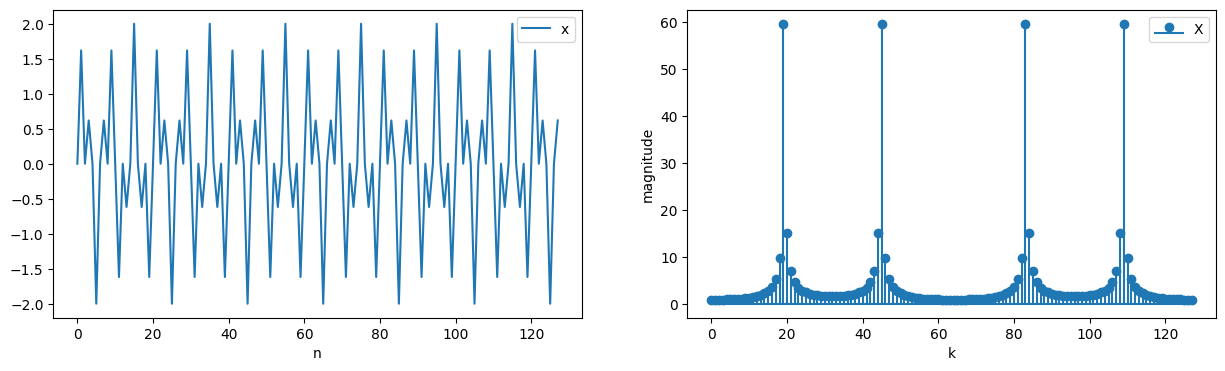

In [2]:
N=128
n=arange(N)
x1=sin(0.3*pi*n)
x2=sin(0.7*pi*n)
x=x1 + x2
X = fft(x)
figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(X),basefmt='C0', label='X')
legend()
ylabel('magnitude')
xlabel('k')
show()

2) Projete quatro filtros passa-altas de ordem 8 e freq. de corte=0.5. (butter, cheby1, cheby2, ellip).<br>
Plotar no mesmo eixo as respostas em frequência, de 0 a pi, juntamente com a FFT do sinal x. Plotar tambem em escala logaritmica a amplitude, com semilogy().

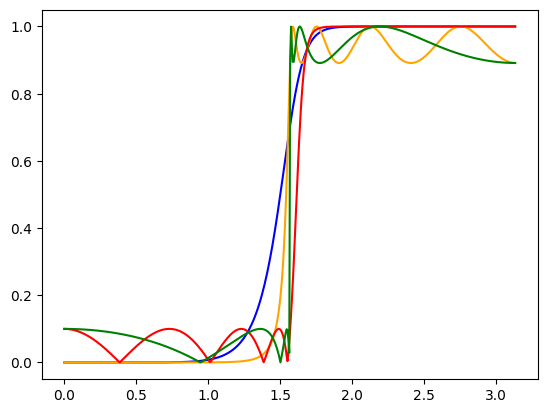

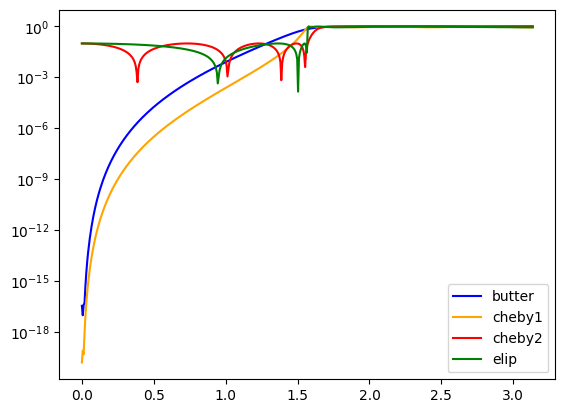

In [10]:
ordem = 8
freq_corte = 0.5
window = [0.5-0.1, 0.5+0.1]
but_b, but_a = butter(ordem, freq_corte,btype="high")
w, but_h= signal.freqz(but_b, but_a)

che1_b, che1_a = cheby1(ordem,1, freq_corte,btype="high")
w, che1_h= freqz(che1_b, che1_a)

che2_b, che2_a = cheby2(ordem,20, freq_corte,btype="high")
w, che2_h= freqz(che2_b, che2_a)

ell_b, ell_a = ellip(ordem, 1, 20, freq_corte,btype="high")
w, ell_h= freqz(ell_b, ell_a)


plot(w, abs(but_h), label="butter", color='blue')
plot(w, abs(che1_h), label="cheby1", color='orange')
plot(w, abs(che2_h), label="cheby2", color='red')
plot(w, abs(ell_h), label="elip"  , color='green')
# plot(wx, abs(X), label="elip")
figure()
semilogy(w, abs(but_h), label="butter", color='blue')
semilogy(w, abs(che1_h), label="cheby1",color='orange')
semilogy(w, abs(che2_h), label="cheby2", color='red')
semilogy(w, abs(ell_h), label="elip",  color='green')
# semilogy(wx, abs(X), label="elip")
legend()

2) Visualizar na mesma tela (com subplots) os diagramas de pólos e zeros.


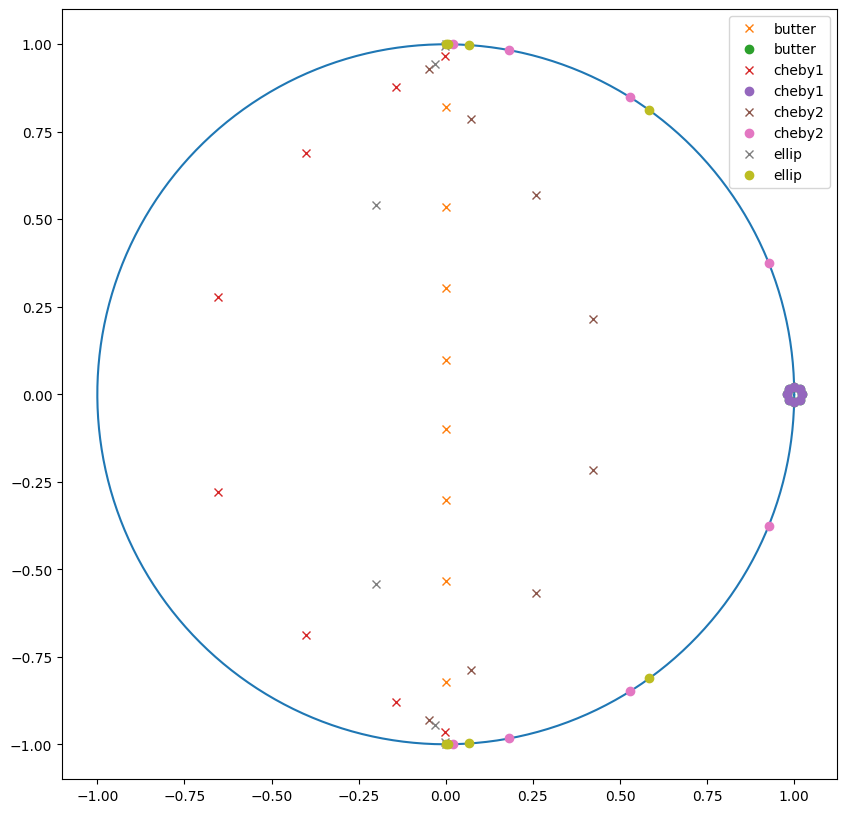

In [9]:
figure(figsize=(10,10))
w = arange(0.0, 2*pi, 0.01)
Z = e**(1j*w)
plot(Z.real, Z.imag)

butter_p, butter_z, butter_k = tf2zpk(but_b, but_a)
cheby1_z, cheby1_p, cheby1_k = tf2zpk(che1_b, che1_a)
cheby2_z, cheby2_p, cheby2_k = tf2zpk(che2_b, che2_a)
ellip_z, ellip_p, ellip_k = tf2zpk(ell_b, ell_a)

plot(butter_z.real, butter_z.imag, 'x', label='butter')
plot(butter_p.real, butter_p.imag, 'o', label='butter')

plot(cheby1_p.real, cheby1_p.imag, 'x', label='cheby1')
plot(cheby1_z.real, cheby1_z.imag, 'o', label='cheby1')

plot(cheby2_p.real, cheby2_p.imag, 'x', label='cheby2')
plot(cheby2_z.real, cheby2_z.imag, 'o', label='cheby2')

plot(ellip_p.real, ellip_p.imag, 'x', label='ellip')
plot(ellip_z.real, ellip_z.imag, 'o', label='ellip')

legend()
show()

4) Obter os sinais filtrados por cada filtro. 

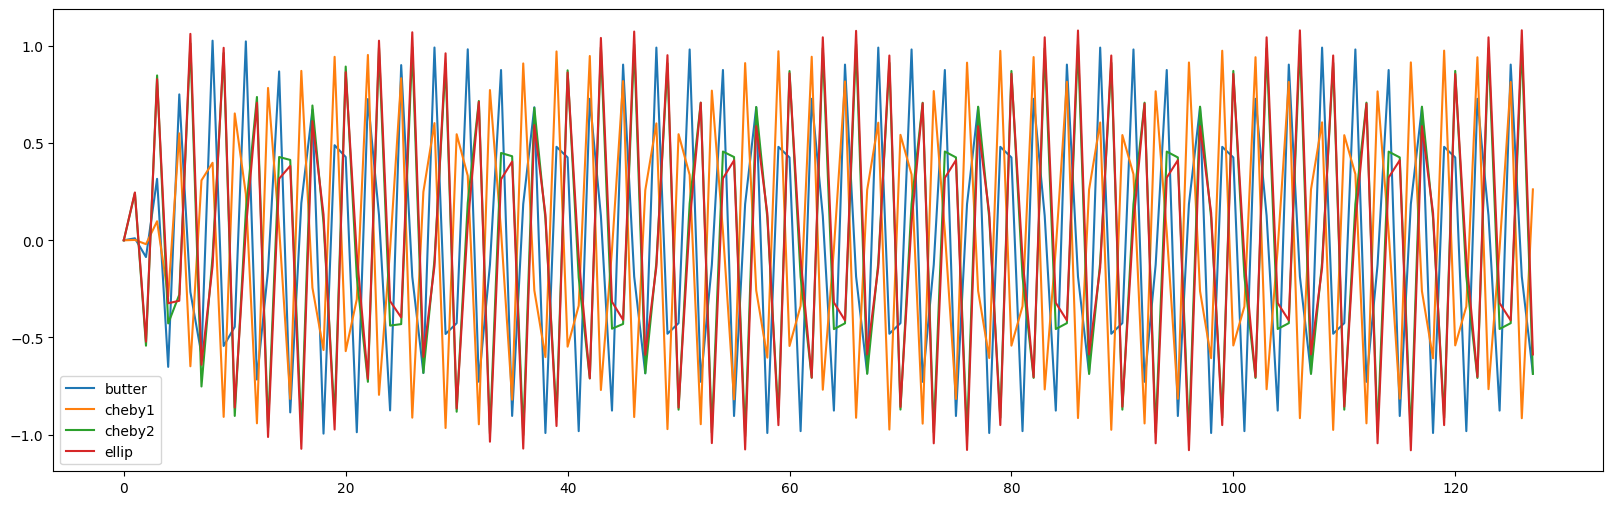

In [ ]:
figure(figsize=(20,6))

butter_signal = signal.lfilter(but_b, but_a, x)
cheby_signal1 = signal.lfilter(che1_b, che1_a, x)
cheby_signal2 = signal.lfilter(che2_b, che2_a, x)
ellip_signal = signal.lfilter(ell_b, ell_a, x)

plot(butter_signal, label='butter')
plot(cheby_signal1, label='cheby1')
plot(cheby_signal2, label='cheby2')
plot(ellip_signal, label='ellip')

legend()
show()

5) Plotar o espectro do sinal filtrado por cada filtro ne mesmo eixo. Repetir, numa escala logaritmica (semilogy())).

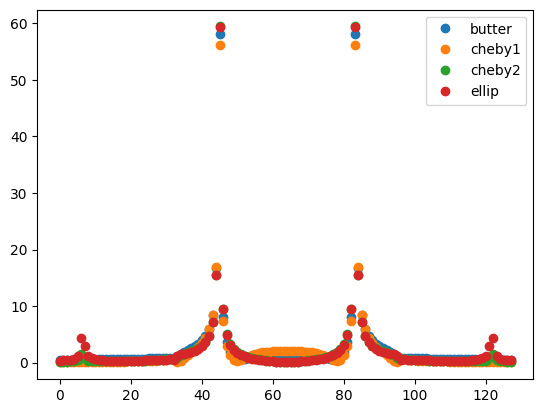

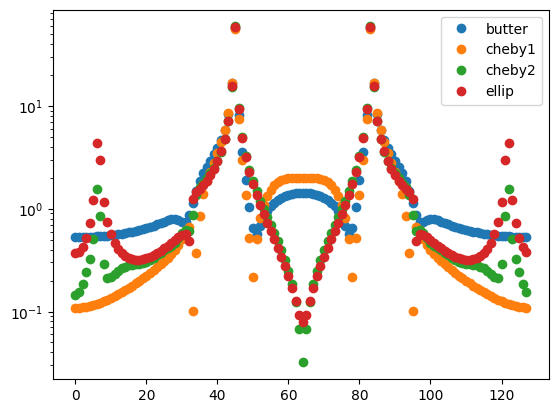

In [ ]:
plot(abs(fft(butter_signal)), 'o', label='butter')
plot(abs(fft(cheby_signal1)), 'o', label='cheby1')
plot(abs(fft(cheby_signal2)), 'o', label='cheby2')
plot(abs(fft(ellip_signal)), 'o', label='ellip')
legend()
figure()

semilogy(abs(fft(butter_signal)), 'o', label='butter')
semilogy(abs(fft(cheby_signal1)), 'o', label='cheby1')
semilogy(abs(fft(cheby_signal2)), 'o', label='cheby2')
semilogy(abs(fft(ellip_signal)), 'o', label='ellip')

legend()